In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Zadanie 1

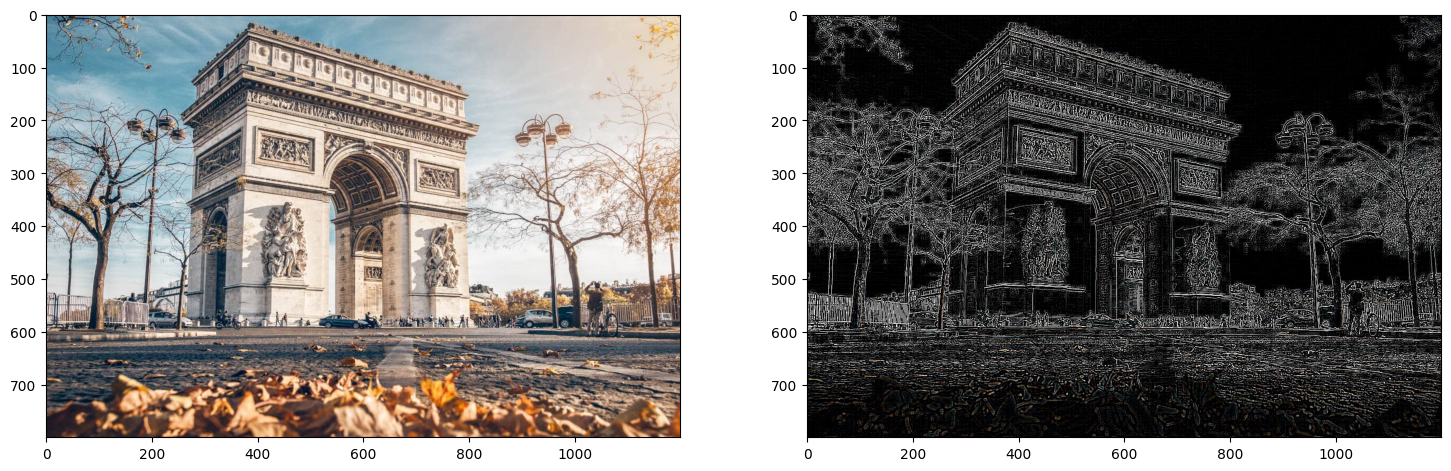

In [2]:
#
plt.rcParams["figure.figsize"] = (18, 10)
image = cv.cvtColor(cv.imread("images/example.jpg"), cv.COLOR_BGR2RGB)

kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
]
kernel = np.asarray(kernel)
filtered_image = cv.filter2D(image, -1, kernel=kernel)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(filtered_image)
#

# Zadanie 2

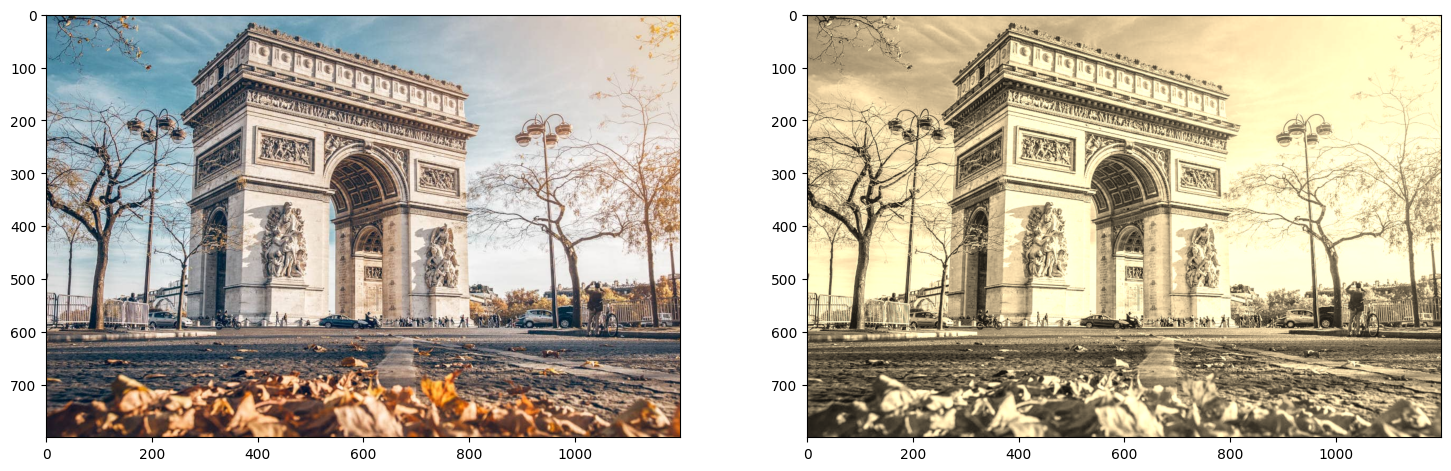

In [3]:
#
transform_matrix = np.asarray([
    [0.393, 0.769, 0.189],
    [0.349, 0.689, 0.164],
    [0.272, 0.534, 0.131]
])

RGB = np.float32(image.reshape(-1, 3))/255

newRGB = np.dot(RGB, transform_matrix.T).reshape(image.shape)
newRGB = np.clip(newRGB, 0.0, 1.0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(newRGB)
#

# Zadanie 3

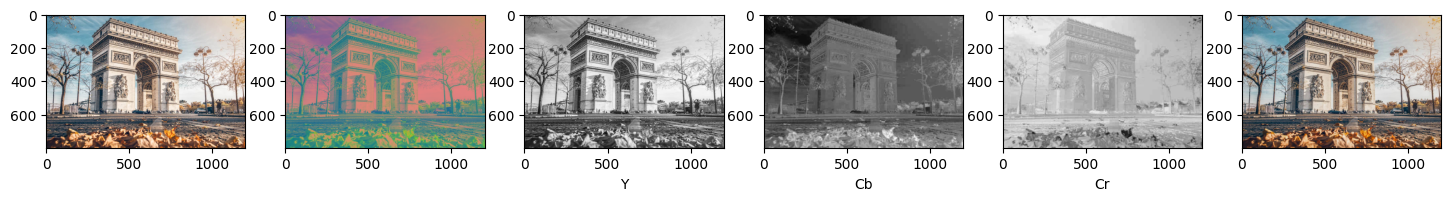

In [4]:
#
transform_matrix = np.asarray([
    [0.229, 0.587, 0.114],
    [0.500, -0.418, -0.082],
    [-0.168, -0.331, 0.500],
])

add_matrix = np.asarray([
    [0, 128, 128],
])

RGB = np.asarray(image.reshape(-1,3))
RGB = RGB.astype(np.uint8)

YCrCb = np.dot(RGB, transform_matrix.T)
YCrCb += add_matrix
YCrCb = np.asarray(YCrCb).reshape(image.shape)
YCrCb = YCrCb.astype(np.uint8)
imageRGB = cv.cvtColor(YCrCb, cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(1, 6)
ax[0].imshow(image)
ax[1].imshow(YCrCb)
ax[2].imshow(YCrCb[:,:,0], cmap='gray')
ax[2].set_xlabel("Y")
ax[3].imshow(YCrCb[:,:,1], cmap='gray')
ax[3].set_xlabel("Cb")
ax[4].imshow(YCrCb[:,:,2], cmap='gray')
ax[4].set_xlabel("Cr")
ax[5].imshow(imageRGB)
#